<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/Copy_of_Copy_of_Copy_of_Ex3_2023a_Ensemble_competition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. 315666479
 2. 318595386

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [ ]:
# Implement here

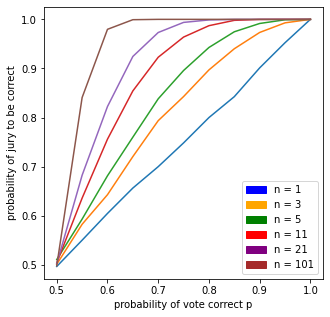

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sampels(n,p,m):
  sampels = p_values = np.random.binomial(1, p, size = (m,n))
  sampels = sampels.sum(axis=1,dtype = 'float')
  sampels = sampels[sampels > n/2]
  return len(sampels)/m


def sim(m):
  n = [1, 3, 5, 11, 21, 101]
  p = np.linspace(0.5, 1.0, 11)
  prob = [[sampels(n_, p_, m) for p_ in p] for n_ in n]
  return np.array(prob)


m = 10000
probability  = sim(m)


x = np.linspace(0.5, 1.0, 11)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.plot(x, probability.T)
plt.ylabel('probability of jury to be correct')
plt.xlabel('probability of vote correct p')
arr1 = plt.arrow(0,0, 0,0, head_width=0.2, color='blue', length_includes_head=True)
arr2 = plt.arrow(0,0, 0,0, head_width=0.2, color='orange', length_includes_head=True)
arr3 = plt.arrow(0,0, 0,0, head_width=0.2, color='green', length_includes_head=True)
arr4 = plt.arrow(0,0, 0,0, head_width=0.2, color='red', length_includes_head=True)
arr5 = plt.arrow(0,0, 0,0, head_width=0.2, color='purple', length_includes_head=True)
arr6 = plt.arrow(0,0, 0,0, head_width=0.2, color='brown', length_includes_head=True)
plt.legend([arr1, arr2, arr3, arr4, arr5, arr6], ['n = 1', 'n = 3', 'n = 5', 'n = 11', 'n = 21', 'n = 101'])
plt.show()


Your proves goes here

ASSUME:

* each individual has a vote $X_i$, that will take the value $+1$ (for voting yes) or $-1$ (for voting no).
* the group decision depending on all voters, whether $S_n= \sum_{i=1}^n X_i$ is positive or negative.

* xi=1,...,n  are independent of one another, and each voter probability to be right its  $p > \frac{1}{2}$.

We will try to prove that when $n \rightarrow \infty $, the probability of the group to get correct decision by majority vote will be tend to $1$.

We will use the weak law of large numbers:
* let $b = p-1/2>0$ ($p > \frac{1}{2}$)
* the general decision can be $+$ or $-$, we may without loss of generality assume the correct answer is $+$.
*$EX_1= -(\frac{1}{2}-b) + (\frac{1}{2}+b) = - \frac{1}{2} + b +\frac{1}{2} +b = 2b $
*The weak law of numbers states that $\frac{S_n}{n}$ in probability to $EX_1=2b$.
* means for any $\varepsilon_1 , \varepsilon_2>0$, there is $N$ large enough such that for $n \geq N,$
\begin{align}
\text P(|\frac{S_n}{n}-EX_1| < \varepsilon_1) > 1 - \varepsilon_2
\end{align}
* lets take $\varepsilon_1=2b$, we see that the probability for a correct decision of the group is:
\begin{align}
\text P(S_n>0) = P(\frac{S_n}{n}>0) \geq P(|\frac{S_n}{n}-2b|<2b) \rightarrow 1  
\end{align}




# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

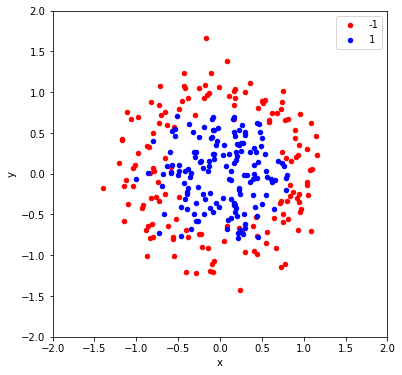

In [66]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [67]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


list_estimators = [1,3,10,50,100,1000,10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=5)
history= {'train_acc': [], 'test_acc': []}

def train_AdaBoostt(n, X_train, X_test, y_train, y_test):
  clf = AdaBoostClassifier( LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6)  ,n_estimators = n, random_state = 42, algorithm='SAMME')
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  return clf,y_pred_train,y_pred_test

Number of estimators: 1
Train Accuracy : 0.52
Test Accuracy with : 0.46
Avg error : 0.4800000000000001
----------------------------------------------------------------


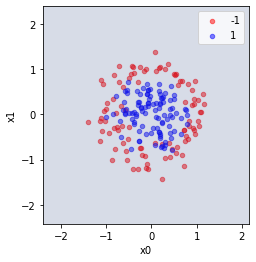

In [69]:
n_estimators = 1
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)

history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)

number_of_estimators_the_model_used_1 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {1}")
print("Train Accuracy :",train_acc)
print("Test Accuracy with :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 

# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 3
Train Accuracy : 0.6
Test Accuracy : 0.5
Avg error : 0.45149596993762464
----------------------------------------------------------------


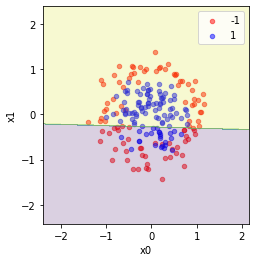

In [ ]:
n_estimators = 3
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)

history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_3 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {3}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 10
Train Accuracy : 0.65
Test Accuracy : 0.67
Avg error : 0.4527360820996151
----------------------------------------------------------------


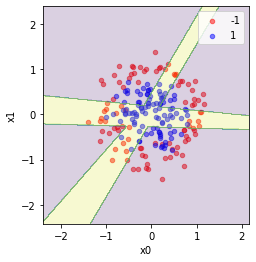

In [ ]:
n_estimators = 10
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_10 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {10}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 50
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.5901969151386092
----------------------------------------------------------------


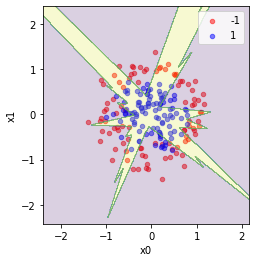

In [ ]:
n_estimators = 50
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_50 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {50}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 100
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.7950984575693046
----------------------------------------------------------------


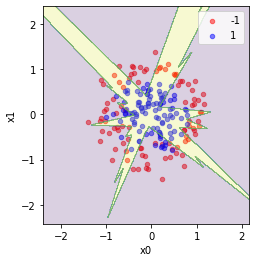

In [ ]:
n_estimators = 100
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_100 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {100}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 1000
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.9795098457569305
----------------------------------------------------------------


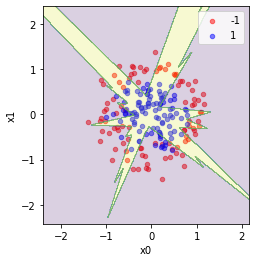

In [ ]:
n_estimators = 1000
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_1000 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {1000}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

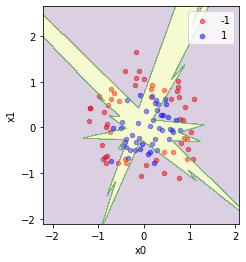

In [ ]:
# plot the best estimator graph
fig, ax = plt.subplots()
plot_data(X_test, y_test, clf.predict, ax)

# Questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

**1. The overall train set accuracy is getting grower until 50 estimators, after that it is doesn't change. As we can see, with one estimator we get 0.52 accuracy on the training set, and starting from 50 estimators we get 0.73 accuracies.**

**2.** **Yes, the model start to overfit after 10 estimators. In order to detect it we plot the train and test accuracy graph. As we can see, until 10 estimators the accuracy on the test set increase until it stabilizes, while the accuracy on the training set continues to increase after 10 estimators until it stabilizes.**

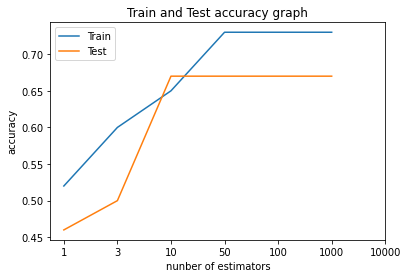

In [ ]:
# plot train and test accuracy graph
xi = list(range(len(list_estimators)))
fig = plt.figure(figsize=(6,4))
plt.plot(history['train_acc'], label='Train')
plt.plot(history['test_acc'], label='Test')
plt.xlabel('nunber of estimators')
plt.ylabel('accuracy')
plt.xticks(xi,list_estimators)
plt.legend()
plt.title('Train and Test accuracy graph')
plt.show()

**3.** **The optimal number of estimators is 38.
In the number of 38 estimators we get the best number of weak classifiers. Meaning they succession in recognizing and classified the right objects. So, we can see that from 38 estimators, there is no improvement in recognizing of the objects.**

In [ ]:
print(f"Estimators {1}:", number_of_estimators_the_model_used_1)
print(f"Estimators {3}:", number_of_estimators_the_model_used_3)
print(f"Estimators {10}: ", number_of_estimators_the_model_used_10)
print(f"Estimators {50}: ", number_of_estimators_the_model_used_50)
print(f"Estimators {100}: ", number_of_estimators_the_model_used_100)
print(f"Estimators {1000}: ", number_of_estimators_the_model_used_1000)

Estimators 1: 1
Estimators 3: 3
Estimators 10:  10
Estimators 50:  38
Estimators 100:  38
Estimators 1000:  38


---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions. 

***Write your code below***


# Imports + Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import preprocessing

In [76]:
x_test = pd.read_csv("/content/x_test.csv")
x_train= pd.read_csv("/content/x_train.csv")
y_train = pd.read_csv("/content/y_train.csv")

# Visualization

In [27]:
x_test.shape

(23205, 593)

In [ ]:
# describe the data
x_train.describe()

,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
count,9055.000000,6.319000e+03,6319.000000,6344.000000,6320.000000,6344.000000,6390.000000,6.336000e+03,6.309000e+03,6.293000e+03,...,6406.000000,6306.000000,6325.000000,6393.000000,6292.000000,6336.000000,6332.000000,6301.000000,6351.000000,6373.000000
mean,4527.000000,1.352541e-01,0.597007,0.481969,0.397697,0.328774,0.273044,2.332613e-01,1.981153e-01,1.760452e-01,...,1.194505,3.736283,4.150040,1.206789,1.147171,3.526357,2.370973,0.529281,4.289403,1.022595
std,2614.097677,2.006150e-01,0.297913,0.302151,0.293714,0.277694,0.262293,2.483091e-01,2.347001e-01,2.260636e-01,...,1.001610,1.782746,1.772685,1.153885,1.877242,4.486542,4.466757,0.650012,2.724750,0.900299
min,0.000000,8.070000e-11,0.000291,0.000084,0.000011,0.000009,0.000003,5.920000e-07,5.000000e-09,5.040000e-10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2263.500000,9.537076e-03,0.340924,0.209290,0.141380,0.093251,0.064512,4.337318e-02,2.920361e-02,2.152900e-02,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,4527.000000,4.782703e-02,0.632522,0.451097,0.333179,0.250731,0.177781,1.377855e-01,1.016490e-01,7.900122e-02,...,1.000000,4.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
75%,6790.500000,1.656702e-01,0.880755,0.752339,0.631329,0.512383,0.415355,3.444897e-01,2.826754e-01,2.403039e-01,...,2.000000,5.000000,5.000000,2.000000,2.000000,4.000000,3.000000,1.000000,6.000000,2.000000
max,9054.000000,9.998509e-01,0.999969,0.999724,0.999908,0.999851,0.999812,9.998352e-01,9.998392e-01,9.996446e-01,...,6.000000,10.000000,10.000000,7.000000,15.000000,40.000000,40.000000,3.000000,16.000000,5.000000


In [100]:
# precentge null for each row
x_train[x_train.columns[x_train.isnull().any()]].isnull().sum() * 100 / x_train.shape[0]

Acc_P10_10th                             30.215351
Acc_P10_1th                              30.215351
Acc_P10_2th                              29.939260
Acc_P10_3th                              30.204307
Acc_P10_4th                              29.939260
                                           ...    
miRNAPairingCount_X3p_bulge_nt           30.027609
miRNAPairingCount_X3p_bulge_target_nt    30.071784
miRNAPairingCount_X3p_mir_bulge          30.414136
miRNAPairingCount_X3p_mismatch           29.861955
miRNAPairingCount_X3p_target_bulge       29.618995
Length: 592, dtype: float64

In [101]:
typee = x_train.dtypes
typee

id                                         int64
Acc_P10_10th                             float64
Acc_P10_1th                              float64
Acc_P10_2th                              float64
Acc_P10_3th                              float64
                                          ...   
miRNAPairingCount_X3p_bulge_nt           float64
miRNAPairingCount_X3p_bulge_target_nt    float64
miRNAPairingCount_X3p_mir_bulge          float64
miRNAPairingCount_X3p_mismatch           float64
miRNAPairingCount_X3p_target_bulge       float64
Length: 593, dtype: object

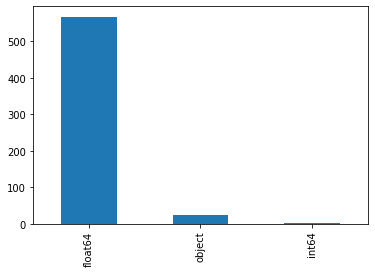

In [102]:
x_train.dtypes.value_counts().plot.bar()

In [103]:
x_train.corr()


,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
id,1.000000,0.001486,0.003202,-0.009565,0.010639,-0.006196,0.013312,0.021001,0.012497,0.021040,...,0.017723,-0.007115,0.019262,-0.012813,0.017317,0.010463,0.004966,0.006915,-0.002497,0.016847
Acc_P10_10th,0.001486,1.000000,0.448334,0.535086,0.632700,0.686252,0.780017,0.828950,0.892341,0.934051,...,-0.001227,0.148524,-0.106813,-0.149821,-0.004189,-0.042064,-0.025697,0.001537,0.030493,-0.018625
Acc_P10_1th,0.003202,0.448334,1.000000,0.852962,0.747125,0.664460,0.602854,0.554926,0.513644,0.485937,...,0.000387,0.075950,-0.062632,-0.110965,0.011014,0.003939,-0.002555,0.027586,0.029101,-0.002028
Acc_P10_2th,-0.009565,0.535086,0.852962,1.000000,0.899167,0.805155,0.713912,0.665244,0.611029,0.582720,...,-0.004330,0.113573,-0.105841,-0.132590,0.015317,0.006013,0.007430,0.018635,0.038124,-0.003587
Acc_P10_3th,0.010639,0.632700,0.747125,0.899167,1.000000,0.920188,0.830740,0.769522,0.714567,0.688477,...,-0.016270,0.121003,-0.118755,-0.155723,-0.008152,-0.039318,-0.015249,-0.008461,0.054659,-0.018409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
miRNAPairingCount_X3p_bulge_nt,0.010463,-0.042064,0.003939,0.006013,-0.039318,-0.011124,-0.036535,-0.048063,-0.037042,-0.048833,...,0.313112,0.096710,0.198728,0.026036,0.205267,1.000000,0.922014,0.031333,-0.342428,0.360161
miRNAPairingCount_X3p_bulge_target_nt,0.004966,-0.025697,-0.002555,0.007430,-0.015249,-0.000089,-0.013435,-0.043986,-0.037487,-0.042124,...,0.397291,0.189551,0.298232,0.076442,-0.212324,0.922014,1.000000,-0.216633,-0.228130,0.456157
miRNAPairingCount_X3p_mir_bulge,0.006915,0.001537,0.027586,0.018635,-0.008461,-0.018693,0.012760,-0.001055,0.023457,-0.007457,...,-0.268068,-0.090221,-0.077956,-0.085792,0.632547,0.031333,-0.216633,1.000000,-0.232686,-0.281194
miRNAPairingCount_X3p_mismatch,-0.002497,0.030493,0.029101,0.038124,0.054659,0.039932,0.071900,0.045450,0.051109,0.056759,...,-0.262242,-0.526729,-0.465309,-0.322735,-0.254060,-0.342428,-0.228130,-0.232686,1.000000,-0.230309


In [130]:
# x_train("Acc_P10_10th","Acc_P10_1th" )
# x_train.loc[:,["Acc_P10_10th","Acc_P10_1th", "Acc_P10_3th	"]]
x_train.iloc[:, 0:3]


,id,Acc_P10_10th,Acc_P10_1th
0,0,0.009997,0.286680
1,1,0.256987,0.263582
2,2,0.318176,NaN
3,3,NaN,0.687934
4,4,NaN,NaN
...,...,...,...
9050,9050,NaN,NaN
9051,9051,0.025510,0.435731
9052,9052,NaN,0.440632
9053,9053,0.085230,0.871697


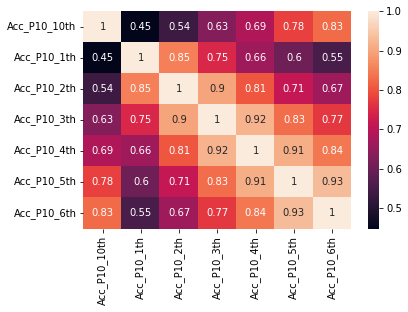

In [135]:
# correlation between the first 8 features
import seaborn as sns
ax = sns.heatmap(x_train.iloc[:, 1:8].corr(), annot=True)

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it. 

***Write your code below***

In [77]:
#merge the data set x_train and x_test
data_merge = pd.concat([x_train,x_test])
data_merge.shape

(32260, 593)

In [78]:
# take only the nomeric features
float_df = data_merge.select_dtypes(include=['float'])
float_df.dtypes.value_counts()

float64    568
dtype: int64

In [79]:
#list for catagorial featurs
list_object = list(data_merge.select_dtypes(include='object'))
list_object

['Seed_match_canonical',
 'Seed_match_noncanonical',
 'miRNAMatchPosition_1',
 'miRNAMatchPosition_10',
 'miRNAMatchPosition_11',
 'miRNAMatchPosition_12',
 'miRNAMatchPosition_13',
 'miRNAMatchPosition_14',
 'miRNAMatchPosition_15',
 'miRNAMatchPosition_16',
 'miRNAMatchPosition_17',
 'miRNAMatchPosition_18',
 'miRNAMatchPosition_19',
 'miRNAMatchPosition_2',
 'miRNAMatchPosition_20',
 'miRNAMatchPosition_21',
 'miRNAMatchPosition_22',
 'miRNAMatchPosition_3',
 'miRNAMatchPosition_4',
 'miRNAMatchPosition_5',
 'miRNAMatchPosition_6',
 'miRNAMatchPosition_7',
 'miRNAMatchPosition_8',
 'miRNAMatchPosition_9']

In [82]:
# nomeric featurs
names = float_df.columns
newwdf = pd.DataFrame(data=None, index=None, columns=names, dtype=None, copy=None)

In [83]:
float_df.shape

(32260, 568)

In [84]:
import numpy as np
from sklearn.impute import SimpleImputer

# handling NaN values for none catagorial featues
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
without_null =imp_mean.fit_transform(float_df)
SimpleImputer()

new_df = pd.DataFrame(without_null)

In [12]:
#no NaN values in our new data
new_df[new_df.columns[new_df.isnull().any()]].isnull().sum() * 100 / x_train.shape[0]

Series([], dtype: float64)

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [89]:

train = new_df[:9055][y_train['label'].notna().values]
labell = y_train[y_train['label'].notna()] 
label = labell['label']

In [41]:
'''train_X, test_X = new_df.iloc[:split], new_df[split:]

train_X = train_X[y_train['label'].notna().values]
test_X = y_train[y_train['label'].notna()] 
train_X['label'] = y_train['label']
imputed_x = train_X[train_X['label'].notna()] 
label = train_X['label'].apply(np.int64)
imputed_x = train_X.drop(columns=['label'])'''

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, label['label'], test_size=0.2, random_state=42)

In [91]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5090, 568), (5090,), (1273, 568), (1273,))

In [ ]:
!pip install lightgbm
import lightgbm


# hyper parametrs tunning for LGBM

In [92]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=-1,
      n_estimators=100,
        reg_alpha=0.3,
         reg_lambda=0.0)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 78.24%


In [93]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=-1,
      n_estimators=100,
        reg_alpha=0.3,
         reg_lambda=0.2)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 78.48%


In [96]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=-1,
      n_estimators=100,
        reg_alpha=0.4,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 78.40%


In [99]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=40,
      n_estimators=200,
        reg_alpha=0.1,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.87%


In [140]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=60,
      n_estimators=200,
        reg_alpha=0.1,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.87%


In [141]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=60,
      n_estimators=200,
        reg_alpha=0.2,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.16%


In [143]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=30,
      n_estimators=200,
        reg_alpha=0.2,
         reg_lambda=0.2)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.26%


In [98]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=-1,
      n_estimators=100,
        reg_alpha=0.3,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.32%


In [137]:
# LGBM
model = lightgbm.LGBMClassifier( 
    max_depth=-1,
      n_estimators=200,
        reg_alpha=0.3,
         reg_lambda=0.3)
model.fit(X_train, Y_train)

Y_pred_LGBM = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred_LGBM)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.63%


### There has been no improvement in over 200 estimators

In [ ]:
test = pd.read_csv("/content/x_test.csv")

In [ ]:
y_pred= model.predict(X_test)
test = pd.read_csv("/content/x_test.csv")

In [ ]:
id = test['id']
print(len(id))
len(y_pred)

23205


1273

In [ ]:
solution = pd.DataFrame(id)
solution['label'] = y_pred.astype(int)
solution.to_csv("solution.csv", index=False)

In [139]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/29 [00:08<?, ?it/s]


KeyboardInterrupt: ignored

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [ ]:
# List of evaluation metrics
# Accuracy - 
# Balanced Accuracy -
# Micro Precision -
# Micro Recall -
# Micro F1-score -
# Macro Precision -
# Macro Recall -
# Macro F1-score -
# Weighted Precision -
# Weighted Recall -
# Weighted F1-score -

In [70]:
# Implement here
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score

print("evaluation metrics:")
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred_LGBM))
print('Balanced Accuracy: %.3f' % balanced_accuracy_score(Y_test, Y_pred_LGBM))
print('Micro Precision: %.3f' % precision_score(Y_test, Y_pred_LGBM, average='micro'))
print('Micro Recall : %.3f' % recall_score(Y_test, Y_pred_LGBM, average='micro'))
print('Micro F1-score: %.3f' % f1_score(Y_test, Y_pred_LGBM, average='micro'))
print('Micro Precision: %.3f' % precision_score(Y_test, Y_pred_LGBM, average='macro'))
print('Micro Recall : %.3f' % recall_score(Y_test, Y_pred_LGBM, average='macro'))
print('Micro F1-score: %.3f' % f1_score(Y_test, Y_pred_LGBM, average='macro'))
print('Micro Precision: %.3f' % precision_score(Y_test, Y_pred_LGBM, average='weighted'))
print('Micro Recall : %.3f' % recall_score(Y_test, Y_pred_LGBM, average='weighted'))
print('Micro F1-score: %.3f' % f1_score(Y_test, Y_pred_LGBM, average='weighted'))


evaluation metrics:
Accuracy: 0.767
Balanced Accuracy: 0.554
Micro Precision: 0.767
Micro Recall : 0.767
Micro F1-score: 0.767
Micro Precision: 0.848
Micro Recall : 0.554
Micro F1-score: 0.622
Micro Precision: 0.777
Micro Recall : 0.767
Micro F1-score: 0.745


### Accuracy-
Model accuracy is the number of correct predictions made by the model divided by the total number of predictions made.

### Balanced Accuracy-
Balanced Accuracy is used in both binary and multi-class classification. It's the arithmetic mean of sensitivity and specificity, its use case is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the othe
Balanced accuracy = (accuracy_class_1 + accuracy_class_2) / 2

### Micro Precision -
Micro precision is calculated by taking the total number of true positive predictions made by the model and dividing it by the total number of positive predictions made by the model. In other words, it is the proportion of positive predictions that are correct.

### Micro Recall -
Micro recall is calculated by taking the total number of true positive predictions made by the model and dividing it by the total number of relevant samples in the dataset. In other words, it is the proportion of relevant samples that were correctly classified by the model.
Micro recall = (true positive) / (true positive + false negative)

### Micro F1-score -
Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP). 
Micro F1 = 2 * (micro precision * micro recall) / (micro precision + micro recall)

### Macro Precision -
Macro precision is calculated by taking the average of the per-class precisions, where the per-class precision is calculated as the number of correctly classified samples in a class divided by the total number of samples classified as belonging to that class.
Macro precision = (precision_class_1 + precision_class_2) / 2

### Macro Recall -
Macro recall is calculated by taking the average of the per-class recalls, where the per-class recall is calculated as the number of correctly classified samples in a class divided by the total number of relevant samples in that class.Macro recall = (recall_class_1 + recall_class_2) / 2

### Macro F1-score -
The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores. This method treats all classes equally regardless of their support values. The value of 0.58 we calculated above matches the macro-
Macro F1 = 2 * (macro precision * macro recall) / (macro precision + macro recall)

### Weighted Precision -
Weighted precision is calculated by taking the sum of the product of the per-class precision and the weight of each class, where the weight of a class is calculated as the number of samples in that class divided by the total number of samples in the dataset
Weighted precision = ∑(precision_class_i * weight_class_i)

### Weighted Recall -
Weighted recall is calculated by taking the sum of the product of the per-class recall and the weight of each class, where the weight of a class is calculated as the number of samples in that class divided by the total number of samples in the dataset. Weighted recall = ∑(recall_class_i * weight_class_i)

### Weighted F1-score -
This metric is the harmonic mean of weighted precision and weighted recall.
The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class's support. 
Weighted F1 = 2 * (weighted precision * weighted recall) / (weighted precision + weighted recall)


we think tat the best evaluation metrics for our task is accuracy because we don't have prior information about it and the data looks balanced.

Since we have a lot of missing values, we think that our accuracy is pretty good relative to that.

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [145]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.1 MB/s 


In [162]:
import shap

model = lightgbm.LGBMClassifier().fit(X_train, Y_train)

predict = model.predict(X_test)


In [ ]:
!pip install interpret


In [196]:
from mlxtend.plotting import plot_confusion_matrix


class_names = ["Fly","Cow","Human","Mouse","Worm"]
disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)


AttributeError: ignored

In [202]:
x_train.columns

Index(['id', 'Acc_P10_10th', 'Acc_P10_1th', 'Acc_P10_2th', 'Acc_P10_3th',
       'Acc_P10_4th', 'Acc_P10_5th', 'Acc_P10_6th', 'Acc_P10_7th',
       'Acc_P10_8th',
       ...
       'miRNAPairingCount_Total_target_bulge', 'miRNAPairingCount_X3p_AU',
       'miRNAPairingCount_X3p_GC', 'miRNAPairingCount_X3p_GU',
       'miRNAPairingCount_X3p_bulge_mir_nt', 'miRNAPairingCount_X3p_bulge_nt',
       'miRNAPairingCount_X3p_bulge_target_nt',
       'miRNAPairingCount_X3p_mir_bulge', 'miRNAPairingCount_X3p_mismatch',
       'miRNAPairingCount_X3p_target_bulge'],
      dtype='object', length=593)

In [203]:
shap_values = shap.TreeExplainer(model).shap_values(x_train)

shap.summary_plot(shap_values[1], x_train.values, feature_names = x_train.columns)

AssertionError: ignored

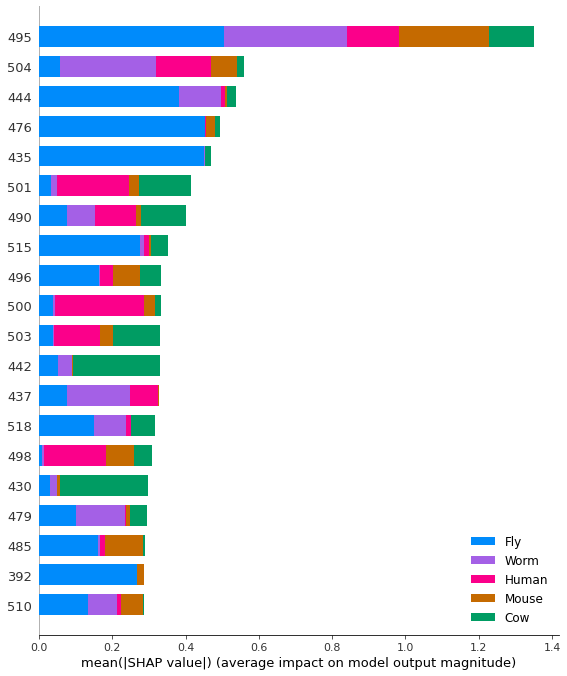

In [148]:
# Fits the explainer
shap_values = shap.TreeExplainer(model).shap_values(X_train)
class_names = ["Fly","Cow","Human","Mouse","Worm"]
shap.summary_plot(shap_values, X_train,class_names= class_names, plot_type="bar")

In [ ]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [188]:
# Fits the explainer
explainer = shap.Explainer(model.predict,x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

TypeError: ignored

In [ ]:
try:
  import lime
except ImportError as e:
  %pip install lime
finally:
  import lime
from lime import lime_tabular


In [181]:
X_train.iloc[:, 1:100]

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
5933,0.74,0.68,0.67,0.02,0.01,0.01,0.10,0.01,0.01,0.01,...,0.01,0.99,0.81,0.31,0.09,0.17,0.13,0.10,0.06,0.06
8571,0.11,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.06,0.01,...,0.04,0.80,0.80,0.80,0.23,0.17,0.13,0.16,0.06,0.04
4434,0.63,0.61,0.42,0.25,0.35,0.15,0.02,0.08,0.00,0.00,...,0.04,0.91,0.43,0.60,0.23,0.55,0.13,0.10,0.07,0.22
1244,0.63,0.45,0.44,0.42,0.18,0.02,0.01,0.08,0.06,0.01,...,0.04,0.23,0.43,0.10,0.09,0.17,0.08,0.07,0.07,0.06
6931,0.63,0.11,0.09,0.08,0.07,0.06,0.06,0.05,0.06,0.05,...,0.06,0.64,0.39,0.31,0.23,0.28,0.24,0.18,0.15,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,0.48,0.05,0.03,0.03,0.03,0.03,0.01,0.08,0.06,0.05,...,0.00,0.19,0.43,0.06,0.01,0.17,0.01,0.10,0.07,0.00
7391,0.63,0.45,0.73,0.66,0.52,0.14,0.50,0.48,0.06,0.36,...,0.23,0.79,0.67,0.38,0.28,0.27,0.27,0.10,0.26,0.06
7438,0.50,0.50,0.50,0.25,0.49,0.49,0.49,0.08,0.47,0.45,...,0.16,0.99,0.43,0.21,0.18,0.18,0.18,0.17,0.17,0.17
7666,0.04,0.04,0.34,0.03,0.18,0.03,0.02,0.02,0.02,0.05,...,0.04,0.69,0.68,0.31,0.11,0.08,0.07,0.05,0.07,0.06


In [182]:
model = lightgbm.LGBMClassifier().fit(X_train.iloc[:, 1:500], Y_train)

predict = model.predict(X_test.iloc[:, 1:500])

In [183]:


explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train.iloc[:, 1:500]),
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)


In [184]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train.iloc[:, 1:500])


# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

In [191]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

Exception: ignored

In [168]:
X_train.shape

(5090, 568)

In [173]:
X_test.iloc[:, 1:500].shape

(1273, 499)

In [185]:
shap.initjs()
explainer = shap.Explainer(model.predict, X_test.iloc[:, 1:500])
shap_values = explainer(X_test.iloc[:, 1:500])

ValueError: ignored

In [ ]:
# Explain here

### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was:
'wakanda forever'